# Porftolio Optimiser

## Description
This program attempts to optimise a users portfolio using the Efficient Frontier. 

## Goal
Create portfolio of assets for which investment has maximum return for given risk level (ideally minimum) OR create portfolio that offers lowest risk for given expected return.

## Theory
Modern portfolio theory (MPT) is a model to creating a portfolio that aims to maximise the return for a given amount of risk. 

MPT encourages diversification of assets. Consider a portfolio of assets, {A, B, C} where the three assets are 'diverse'. If the three assets have little to zero correlation then we can have a portfolio with low variance on returns. 

Efficient Frontier is a graph of 'Expected returns' versues 'Volatility'. Points inside graph show set of optimal portfolios of expected returns for given risk (measured as volatility) or risk given expected returns. Points outside line are sub-optimal. 

### Assumptions
1. Asset Returns are (Jointly) Normally Distributed Random Variables
2. Correlations between Assets are Fixed and Constant Forever
3. All Investors Aim to Maximize Economic Utility
4. All Investors are Rational and Risk Averse
5. All Investors have Access to the Same Information at the Same Time
6. All Investors have Access to the Same Information at the Same Time
7. There are no Taxes or Transaction Costs
8. Investors are Price Takers
9. Every Investor has a Credit Limit
10. All Securities can be Divided into Parcels of Any Size

### Basics of the model



### 1. Portfolio Expected Return

Each asset in portfolio is weighted i.e. the proportion the asset makes up the portfolio. To calculate expected return of the porfolio we multiply weights of each asset by the expected returns of each asset, and sum.


### 2. Portfolio Standard deviation (volatility)

Calculate the annual covariance matrix and take the inner product with the weights. 

### 3. Sharpe Ratio

Sharpe ratio measures the return of an investment in relation to the risk-free rate and its risk profile.

In general, higher value of Sharpe ratio the better and lucractive the investement. 

### 4. Efficient Frontier

Plot of 'Expected return' vs 'Volatility'




# Import Packages

In [1]:
cd ../src

/Users/syed/Desktop/ideal-stock-portfolio/src


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

import os.path

from assets_class import Asset
from portfolio_class import Portfolio
from database_setup_class import Database, get_ticker_symbols

from datetime import datetime

%load_ext autoreload
%autoreload 2


# Download/Read to/from database

In [3]:
database_name = 'DJIA'
djia = Database(database_name)


if not os.path.exists(f'../data/{database_name}.db'):
    date_range = ['2010-01-01', '2022-01-01']
    ticker_list = get_ticker_symbols('DJIA') + ['^GSPC']
    # Create database instance
    djia = Database('DJIA')
    djia.add_stock_to_database(ticker_list, start= date_range[0], end=date_range[1])
    djia.update_database()
    
else:
    djia.update_database()
    ticker_list = djia.get_ticker_list()


[*********************100%***********************]  1 of 1 completed
Sucessfully added MMM to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added AXP to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added AMGN to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added AAPL to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added BA to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added CAT to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added CVX to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added CSCO to database
[*********************100%***********************]  1 of 1 completed
Sucessfully added KO to database
[*********************100%***********************]  1 of 1 completed
Suc

In [4]:
ticker_list_small = ticker_list[:5]
data = djia.read_all_stocks_data(ticker_list=ticker_list_small)


# Create training and test data 
Split data up to see how well the optimiser works for the last year. We will use all years until the last year to train the optimiser and test the optimised weights for the last year

In [5]:
# save the recent year seperately 
data_test = [d.iloc[d.shape[0] - 250:, :] for d in data]
# update data we will use
data = [d.iloc[:d.shape[0] - 250, :] for d in data]

In [6]:
data_test_close = pd.concat(
            [data["Close"] for data in data_test], axis=1
        )

data_test_close.columns = ticker_list_small

In [ ]:
data_test

# Create portfolio

In [7]:
portfolio = Portfolio([Asset({"name": ticker, "data": data[i] }) for i,ticker in enumerate(ticker_list_small) ])


In [8]:
weights = portfolio.set_random_weights()
weights

array([0.31790766, 0.27720617, 0.04449884, 0.1135205 , 0.24686682])

In [9]:
portfolio.covariance_matrix()

,MMM,AXP,AMGN,AAPL,BA
MMM,0.047531,0.035583,0.023492,0.027026,0.038504
AXP,0.035583,0.082893,0.028226,0.033718,0.063474
AMGN,0.023492,0.028226,0.061018,0.026269,0.027171
AAPL,0.027026,0.033718,0.026269,0.080144,0.040125
BA,0.038504,0.063474,0.027171,0.040125,0.125648


# Optimise Portolfio 

In [10]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
returns, stds, weights = portfolio.monte_carlo(iterations=1000)


In [13]:
# Drawing the efficient frontier
X = []
y = []
for rt in np.linspace(-500, 500, 5000):
    weights = portfolio.optimise_with_risk_tolerance(rt)
    X.append(portfolio.portfolio_std(weights))
    y.append(portfolio.portfolio_expected_return(weights))

In [14]:
RISK_TOLERANCE = 20;
EXPECTED_RETURN = 0.25


riskless_weights = portfolio.optimise_with_risk_tolerance(0)
riskless_optimise_volatility = portfolio.portfolio_std(riskless_weights)
riskless_optimise_expected_return = portfolio.portfolio_expected_return(riskless_weights)


risk_tol_weights = portfolio.optimise_with_risk_tolerance(risk_tolerance=RISK_TOLERANCE)
risk_tol_optimise_volatility = portfolio.portfolio_std(risk_tol_weights)
risk_tol_optimise_expected_return = portfolio.portfolio_expected_return(risk_tol_weights)


expect_return_weights = portfolio.optimise_with_expected_return(expected_return=EXPECTED_RETURN)
expect_return_optimise_volatility = portfolio.portfolio_std(expect_return_weights)
expect_return_optimise_expected_return = portfolio.portfolio_expected_return(expect_return_weights)

sharpe_ratio_weights = portfolio.optimise_sharpe_ratio()
sharpe_ratio_optimise_volatility = portfolio.portfolio_std(sharpe_ratio_weights)
sharpe_ratio_optimise_expected_return = portfolio.portfolio_expected_return(sharpe_ratio_weights)


# Returns and Volatility Data Frame

In [15]:
volatility_returns_df = pd.DataFrame.from_dict(
    {
        "Return": [
    riskless_optimise_expected_return,risk_tol_optimise_expected_return, 
    expect_return_optimise_expected_return,sharpe_ratio_optimise_expected_return
        ], 
        "Volatility": [
            riskless_optimise_volatility, risk_tol_optimise_volatility,
            expect_return_optimise_volatility, sharpe_ratio_optimise_volatility
        ]
    }, orient="index", columns=['Riskless', 'Riskfull', "ExpectReturn", "SharpeRatio"]

)



volatility_returns_df



,Riskless,Riskfull,ExpectReturn,SharpeRatio
Return,0.118735,0.256910,0.123752,0.232172
Volatility,0.189556,0.283096,0.250000,0.250472


# Optimal weights data frame

In [16]:
optimal_weights = pd.DataFrame()

optimal_weights = pd.concat([pd.Series(riskless_weights), pd.Series(risk_tol_weights), pd.Series(sharpe_ratio_weights), pd.Series(expect_return_weights)], axis=1)
optimal_weights.index = [asset.name for asset in portfolio.assets]
optimal_weights.columns = ['Riskless', 'Riskfull', "ExpectReturn", "SharpeRatio"]

optimal_weights

,Riskless,Riskfull,ExpectReturn,SharpeRatio
MMM,0.461678,1.474515e-15,3.099041e-17,0.022916
AXP,0.063192,0.000000e+00,0.000000e+00,0.306798
AMGN,0.310818,0.000000e+00,1.918194e-01,0.139518
AAPL,0.164312,1.000000e+00,8.081806e-01,0.110614
BA,0.000000,1.873501e-16,4.870012e-17,0.420154


# Plot Efficient Frontier

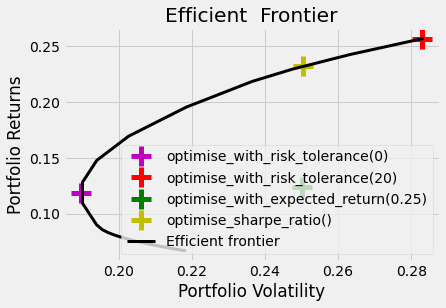

In [18]:
plt.plot(riskless_optimise_volatility, riskless_optimise_expected_return, 'm+', markeredgewidth=5, markersize=20, label='optimise_with_risk_tolerance(0)')
plt.plot(risk_tol_optimise_volatility, risk_tol_optimise_expected_return, 'r+', markeredgewidth=5, markersize=20, label='optimise_with_risk_tolerance(20)')
plt.plot(expect_return_optimise_volatility, expect_return_optimise_expected_return, 'g+', markeredgewidth=5, markersize=20, label='optimise_with_expected_return(0.25)')
plt.plot(sharpe_ratio_optimise_volatility, sharpe_ratio_optimise_expected_return, 'y+', markeredgewidth=5, markersize=20, label='optimise_sharpe_ratio()')
# plt.scatter(stds, returns, s=4)
plt.plot(X, y, color='k', linewidth=3, label='Efficient frontier')

plt.title("Efficient  Frontier")
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Returns")
plt.legend(loc="lower right")
plt.show()

# Test: If 1000 USD invested last year then how much return would i get?

In [ ]:
amount_invest = 1000
expected_return = pd.DataFrame(amount_invest * (1 + volatility_returns_df.iloc[0,:] ))
print("--------------------------------------------------------------------------------")
print("                          Expected Returns on Potfolio                          ")
print("--------------------------------------------------------------------------------")
print(expected_return)
print("")
print(f"If {amount_invest} USD was invested on {data_test[0].iloc[0,0]}| I would have ...")
data_test = data_test_close
actual_return = (data_test.iloc[data_test.shape[0]-1,:] - data_test.iloc[0,:])/data_test.iloc[0,:]
beg_price = data_test.iloc[0,:]
end_price = data_test.iloc[data_test.shape[0]-1,:]
percentage_change = (end_price - beg_price)/(beg_price) + 1

print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,0]
print(f"Using the Portfolio Weights for Risk Tolerance {0} (Riskless)")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Starting balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")

print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,1]
print(f"Using the Portfolio Weights for Risk Tolerance {RISK_TOLERANCE}")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Starting balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")


print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,2]
print(f"Using the Portfolio Weights for Expect to Return {EXPECTED_RETURN}%")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Starting balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")


print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,3]
print(f"Using the Portfolio Weights for Sharpe Ratio")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Starting balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")

